In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class GamblerMDP:
    def __init__(self, p_heads=0.4, theta=1e-3, gamma=1.0, max_capital=100):
        self.p_heads = p_heads
        self.theta = theta
        self.gamma = gamma
        self.max_capital = max_capital
        
        self.values = np.zeros(max_capital+1, dtype=float)
        self.policy = np.zeros(max_capital+1, dtype=float)
    
    def states(self):
        # Iterate over all non terminating states (exclude state 0 and 100)
        for s in range(1, self.max_capital):
            yield s
    
    def transitions(self, state, action):
        if state in (0, self.max_capital) or action == 0:
            # Return next_state, p_next_state, reward
            yield state, 1.0, 0
            return
        
        # Winning round
        next_state = state + action
        reward = 1 if next_state == self.max_capital else 0
        yield next_state, self.p_heads, reward
        
        # Losing round
        next_state = state - action
        yield next_state, 1 - self.p_heads, 0
        
    def actions(self, state):
        if state in (0, self.max_capital):
            yield 0
            return
        
        for a in range(1, min(state, self.max_capital - state) + 1):
            yield a
            
    def q_values(self, state):
        qs = []
        actions = []
        for a in self.actions(state):
            q = 0.0
            for next_state, p_next_state, r in self.transitions(state, a):
                q += p_next_state * (r + self.values[next_state] * self.gamma)
            qs.append(q)
            actions.append(a)
        return qs, actions
    
    def value_iteration(self):
        while True:
            delta = 0.0
            for s in self.states():
                v_old = self.values[s]
                qs, actions = self.q_values(s)
                v_new = np.max(qs)
                self.values[s] = v_new
                delta = max(delta, np.abs(v_new - v_old))
            if delta < self.theta:
                break
                
    def update_greedy_policy(self):
        for s in self.states():
            qs, actions = self.q_values(s)
            a_max = actions[np.argmax(np.round(qs, 5))] # Round off to 5 decimals to get correct figure
            self.policy[s] = a_max

In [13]:
def visualize_gambler(values, policy):
    f, axs = plt.subplots(1,2,figsize=(14,6))
    x = np.arange(policy.shape[0])
    ax = axs[0]
    ax.step(x, values)
    ax.grid()
    ax.set_title('values')
    ax.set_xlabel('states')
    ax.set_ylabel('probability of winning')
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_yticks(np.arange(0, 1.1, 0.1))


    ax = axs[1]
    ax.step(x, policy)
    ax.grid()
    ax.set_title('policy')
    ax.set_xlabel('states')
    ax.set_ylabel('action, stake')
    ax.set_xticks(np.arange(0, 110, 10))
    ax.set_yticks(np.arange(0, 60, 5))
    plt.show()

In [14]:
gambler1 = GamblerMDP(p_heads=0.4, theta=1e-9)
gambler1.value_iteration()
gambler1.update_greedy_policy()

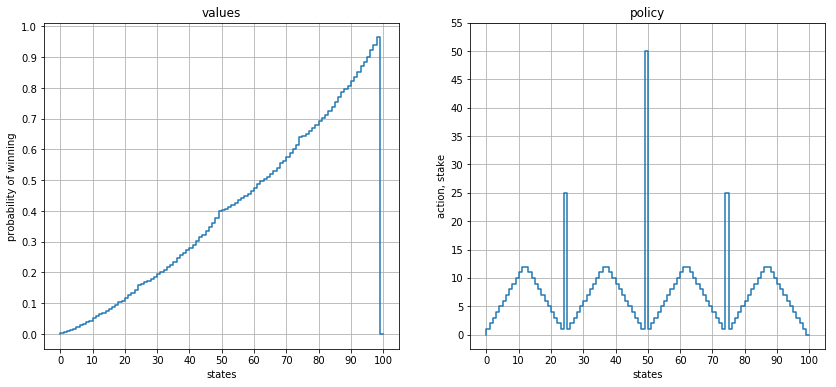

In [15]:
visualize_gambler(gambler1.values, gambler1.policy)

In [16]:
gambler2 = GamblerMDP(p_heads=0.25, theta=1e-9)
gambler2.value_iteration()
gambler2.update_greedy_policy()

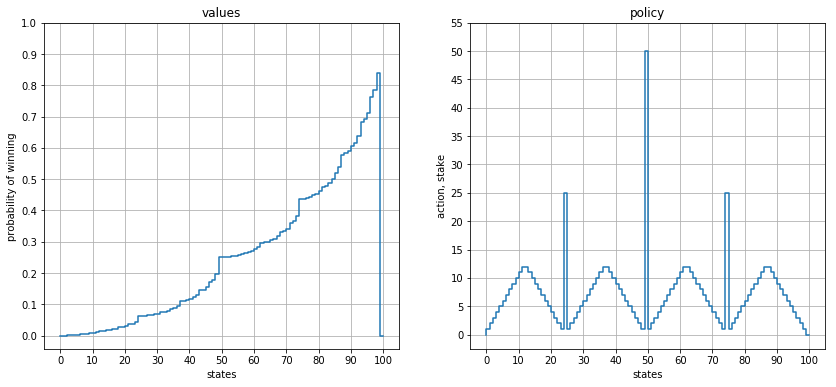

In [17]:
visualize_gambler(gambler2.values, gambler2.policy)

In [18]:
gambler3 = GamblerMDP(p_heads=0.55, theta=1e-9)
gambler3.value_iteration()
gambler3.update_greedy_policy()

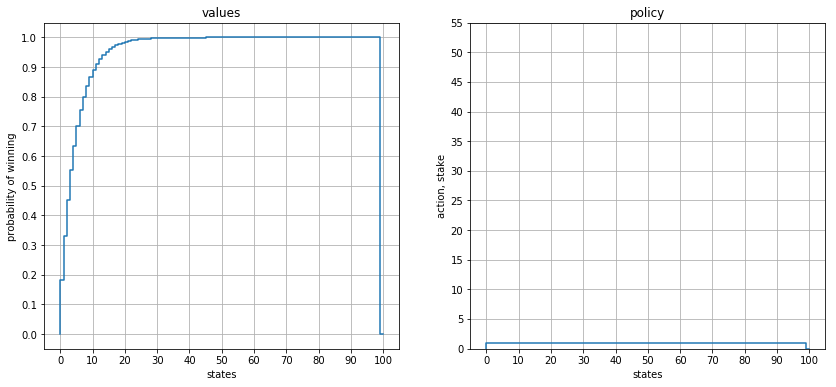

In [19]:
visualize_gambler(gambler3.values, gambler3.policy)